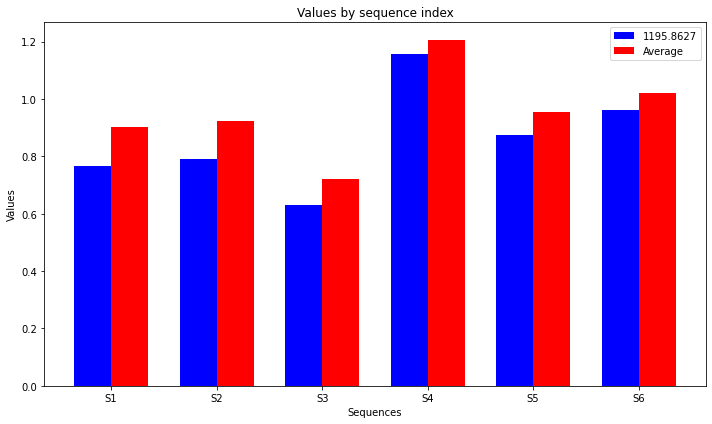

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


# Convert dictionary to DataFrame
df = pd.read_csv('imm_0.0_tol_0.05.csv')

# Drop the sequence column
df = df.drop('sequence', axis=1)

# Extract values for 851.4269 and average of each row
single_number_values = df['1195.8627'].tolist()
average_values = df.mean(axis=1).tolist()

fig, ax = plt.subplots(figsize=(10, 6))

bar_width = 0.35
indices = np.arange(len(single_number_values))

bar1 = ax.bar(indices, single_number_values, bar_width, label='1195.8627', color='b')  # updated label from '851.4269' to '1195.8627'
bar2 = ax.bar(indices + bar_width, average_values, bar_width, label='Average', color='r')

# Describe the data
ax.set_xlabel('Sequences')
ax.set_ylabel('ΔF/F')
ax.set_title('Values by sequence index')
ax.set_xticks(indices + bar_width / 2)
sequence_labels = ["S" + str(i) for i in range(1, len(single_number_values) + 1)]  # Generate sequence labels S1, S2, ..., S6
ax.set_xticklabels(sequence_labels)  # Updated to use sequence labels
ax.legend()

plt.tight_layout()
plt.show()


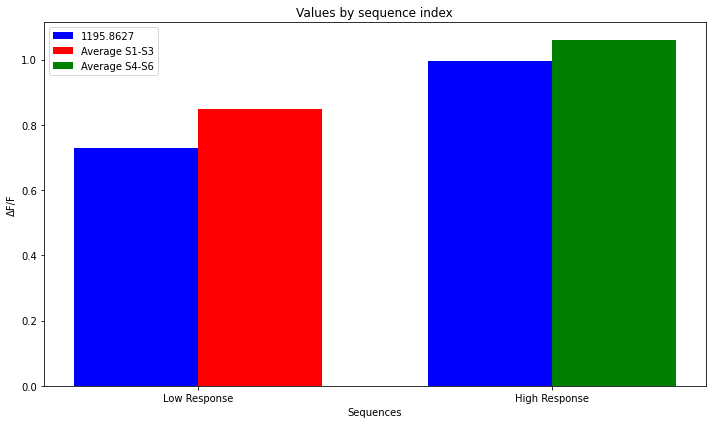

In [11]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Convert dictionary to DataFrame
df = pd.read_csv('imm_0.0_tol_0.05.csv')

# Drop the sequence column
df = df.drop('sequence', axis=1)

# Extract values for 1195.8627
_single_number_values = df['1195.8627'].tolist()
single_number_values = [sum(_single_number_values[:3]) / 3, sum(_single_number_values[-3:]) / 3]

# Compute averages for S1 to S3 and S4 to S6
avg_S1_S3 = df.iloc[:3].mean(axis=1).mean()
avg_S4_S6 = df.iloc[3:6].mean(axis=1).mean()

# Plot
fig, ax = plt.subplots(figsize=(10, 6))

bar_width = 0.35
indices = np.arange(len(single_number_values))

bar1 = ax.bar(indices, single_number_values, bar_width, label='1195.8627', color='b')
bar2 = ax.bar(indices[0] + bar_width, [avg_S1_S3], bar_width, label='Average S1-S3', color='r')
bar3 = ax.bar(indices[1] + bar_width, [avg_S4_S6], bar_width, label='Average S4-S6', color='g')

# Describe the data
ax.set_xlabel('Sequences')
ax.set_ylabel('ΔF/F')
ax.set_title('Values by sequence index')
ax.set_xticks(indices + bar_width / 2)
sequence_labels = ["Low Response", "High Response"]
ax.set_xticklabels(sequence_labels)
ax.legend()

plt.tight_layout()
plt.show()


In [7]:
single_number_values

[0.7649787935844705,
 0.7908145781538553,
 0.6287778905464876,
 1.1571641782798674,
 0.872983278787441,
 0.9621209866770954]

In [13]:
df.iloc[:3].mean(axis=1).mean()

0.847890665175575

imm_0.0_tol_0.05.csv
imm_0.0_tol_0.1.csv
Column '1195.8627' not found in DataFrame. Skipping plot for this dataset.
imm_0.05_tol_0.05.csv
imm_0.05_tol_0.1.csv
imm_0.1_tol_0.05.csv
imm_0.1_tol_0.1.csv
imm_0.15_tol_0.05.csv
imm_0.15_tol_0.1.csv
imm_0.2_tol_0.05.csv
imm_0.2_tol_0.1.csv


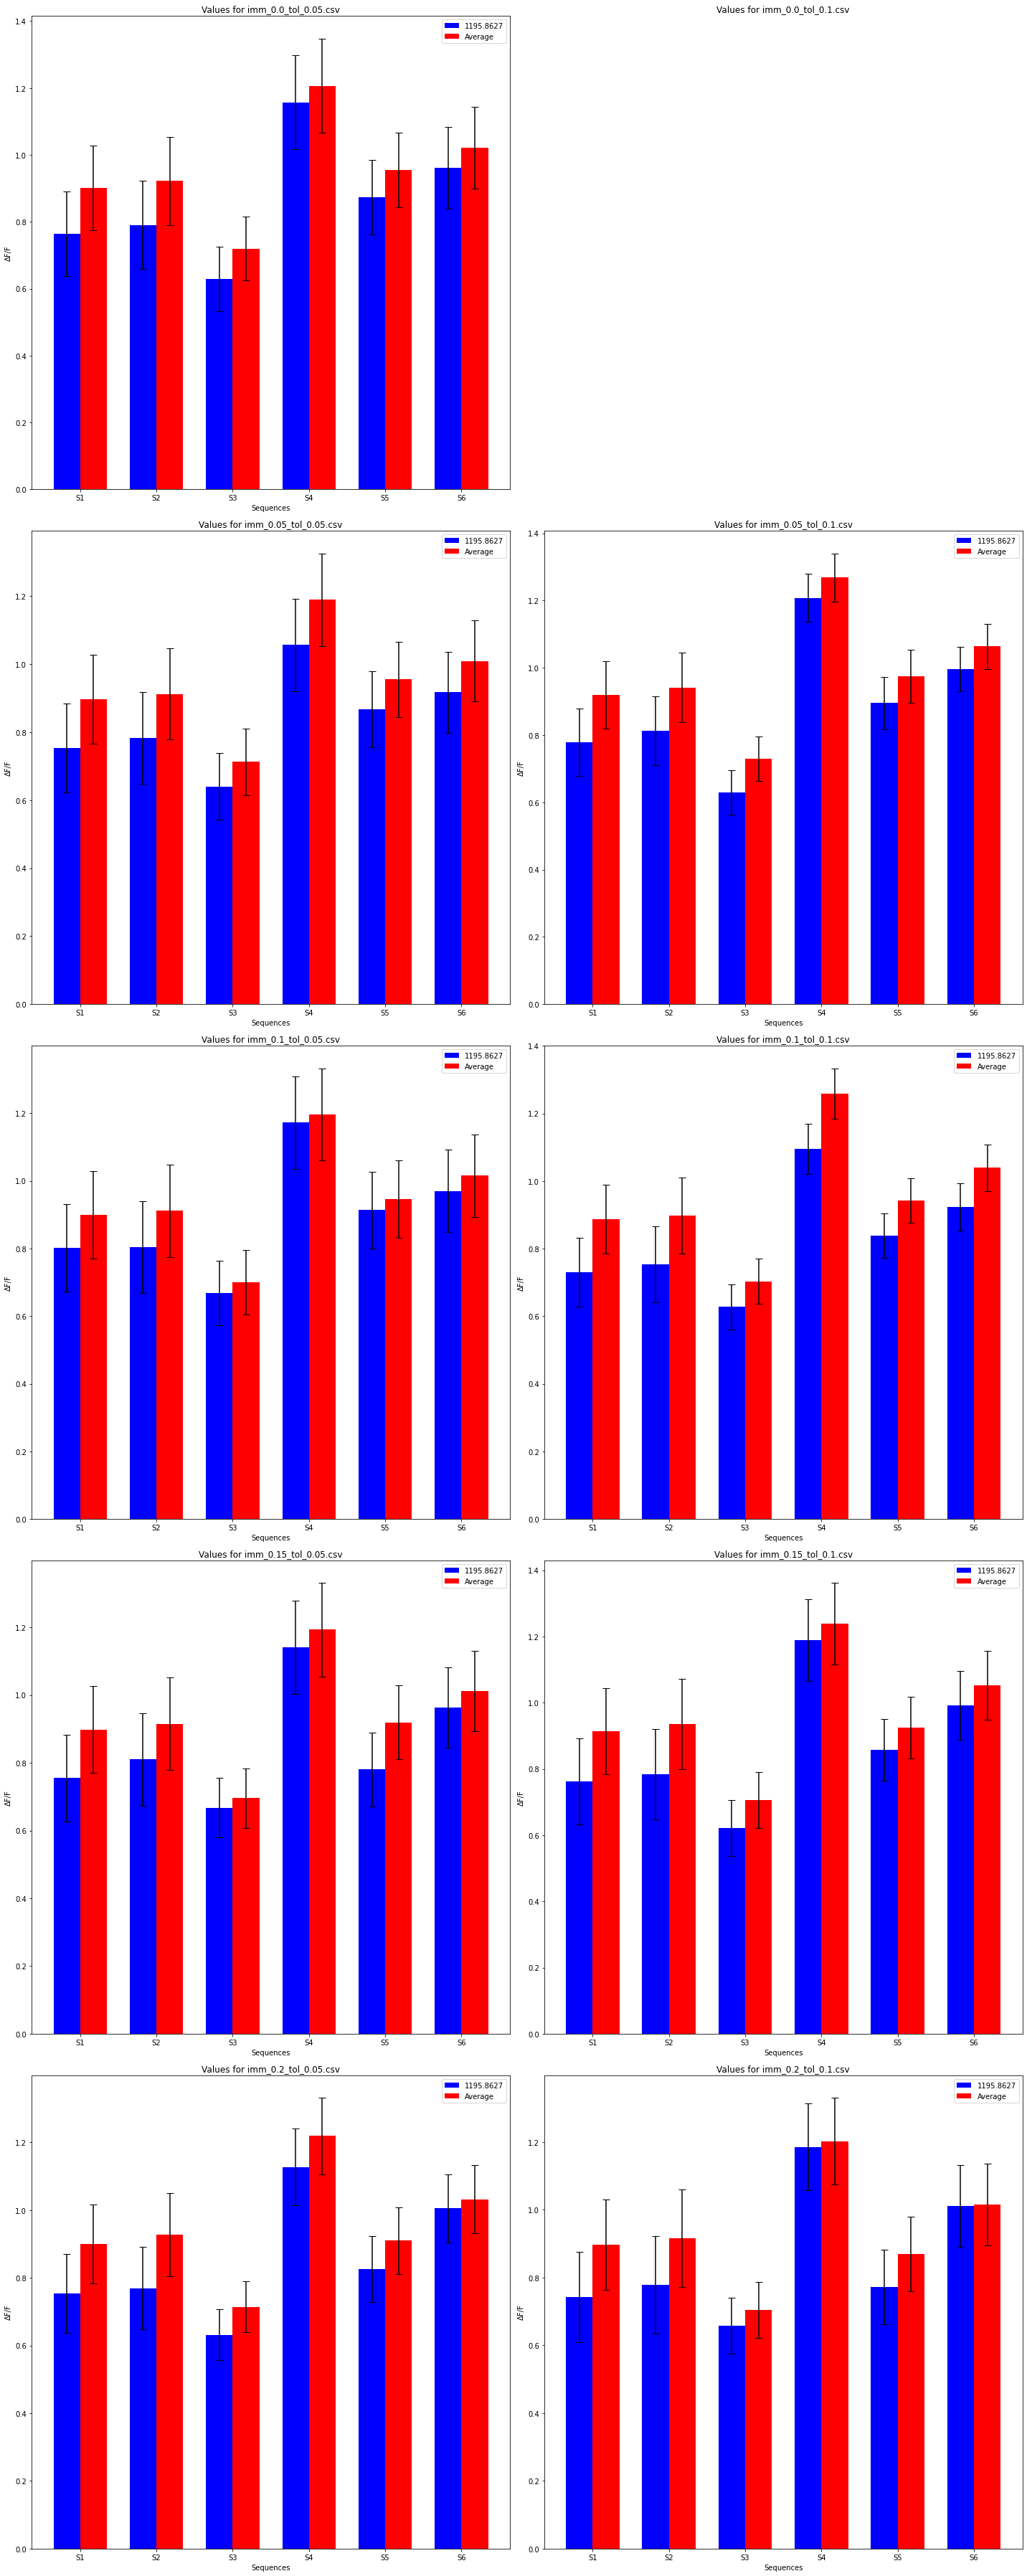

In [21]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import glob

# Get the sorted list of filenames
defined_format = "csv"
threshold_format_list = sorted(
    [_dir for _dir in glob.glob(f'imm_*_tol_*.{defined_format}')],
    key=lambda x: (float(x.split('_')[1]), float(x.split('_')[3].replace(f'.{defined_format}', '')))
)

# Define the plotting function
def plot_data(ax, df):
    if '1195.8627' not in df.columns:
        print(f"Column '1195.8627' not found in DataFrame. Skipping plot for this dataset.")
        ax.axis('off')  # hide the axis for this subplot
        return

    single_number_values = df['1195.8627'].tolist()
    average_values = df.mean(axis=1).tolist()
    stdev_values = df.std(axis=1).tolist()
    
    bar_width = 0.35
    indices = np.arange(len(single_number_values))

    ax.bar(indices, single_number_values, bar_width, yerr=stdev_values, label='1195.8627', color='b', capsize=5)
    ax.bar(indices + bar_width, average_values, bar_width, yerr=stdev_values, label='Average', color='r', capsize=5)
    print(single_number_values)
    print(single_number_values)    
    ax.set_xlabel('Sequences')
    ax.set_ylabel('ΔF/F')
    ax.set_xticks(indices + bar_width / 2)
    sequence_labels = ["S" + str(i) for i in range(1, len(single_number_values) + 1)]
    ax.set_xticklabels(sequence_labels)
    ax.legend()

# Create the subplots
num_files = len(threshold_format_list)
fig, axs = plt.subplots(num_files // 2 + num_files % 2, 2, figsize=(20, 10 * num_files // 2))
axs = axs.ravel()

for idx, file_name in enumerate(threshold_format_list):
    print(file_name)
    df = pd.read_csv(file_name)
    df = df.drop('sequence', axis=1)
    plot_data(axs[idx], df)
    axs[idx].set_title(f'Values for {file_name}')

# If there's an odd number of files, hide the last (unused) subplot
if num_files % 2:
    axs[-1].axis('off')

plt.tight_layout()
plt.show()


Column '1195.8627' not found in imm_0.0_tol_0.1.csv. Skipping plot for this dataset.


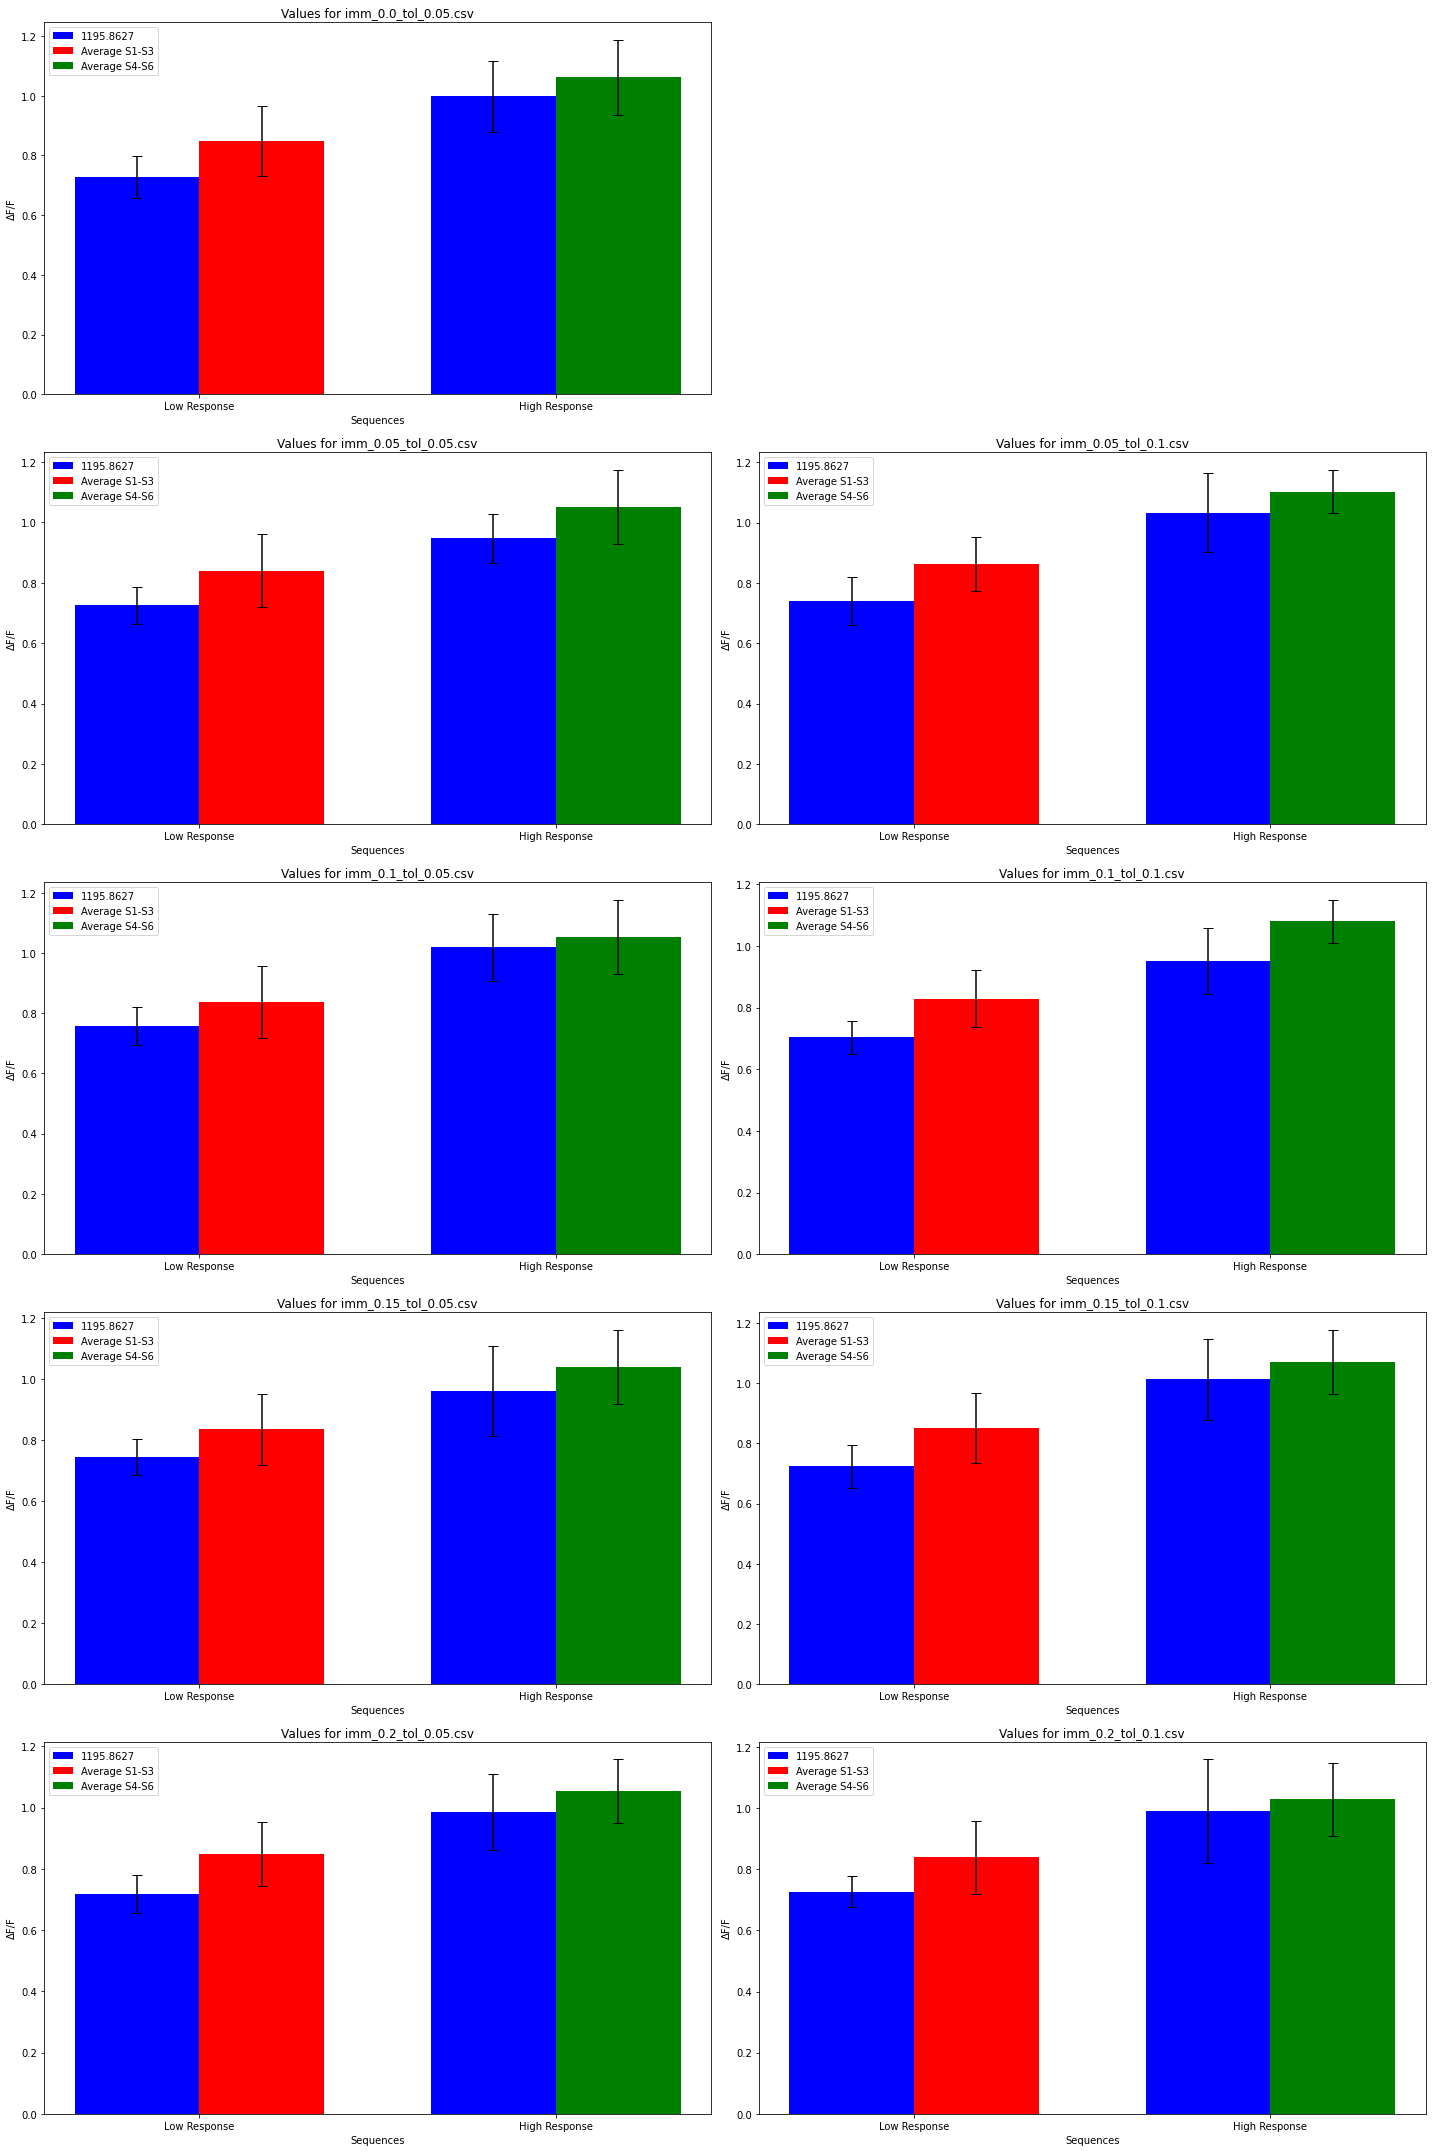

In [20]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import glob

def plot_csv(file_name, ax):
    df = pd.read_csv(file_name)
    
    # Check if the required column exists
    if '1195.8627' not in df.columns:
        print(f"Column '1195.8627' not found in {file_name}. Skipping plot for this dataset.")
        ax.axis('off')  # hide the axis for this subplot
        return
    
    df = df.drop('sequence', axis=1)

    _single_number_values = df['1195.8627'].tolist()
    single_number_values = [sum(_single_number_values[:3]) / 3, sum(_single_number_values[-3:]) / 3]
    single_number_stdev = [np.std(_single_number_values[:3]), np.std(_single_number_values[3:])]
    
    avg_S1_S3 = df.iloc[:3].mean(axis=1).mean()
    avg_S4_S6 = df.iloc[3:6].mean(axis=1).mean()
    
    stdev_S1_S3 = df.iloc[:3].std(axis=1).mean()
    stdev_S4_S6 = df.iloc[3:6].std(axis=1).mean()

    bar_width = 0.35
    indices = np.arange(len(single_number_values))
    
    ax.bar(indices, single_number_values, bar_width, yerr=single_number_stdev, label='1195.8627', color='b', capsize=5)
    ax.bar(indices[0] + bar_width, [avg_S1_S3], bar_width, yerr=[stdev_S1_S3], label='Average S1-S3', color='r', capsize=5)
    ax.bar(indices[1] + bar_width, [avg_S4_S6], bar_width, yerr=[stdev_S4_S6], label='Average S4-S6', color='g', capsize=5)
    
    ax.set_xlabel('Sequences')
    ax.set_ylabel('ΔF/F')
    ax.set_title(f'Values for {file_name}')
    ax.set_xticks(indices + bar_width / 2)
    ax.set_xticklabels(["Low Response", "High Response"])
    ax.legend()

# Get the list of CSV files
defined_format = "csv"
csv_files = sorted(
    [_dir for _dir in glob.glob(f'imm_*_tol_*.{defined_format}')],
    key=lambda x: (float(x.split('_')[1]), float(x.split('_')[3].replace(f'.{defined_format}', '')))
)

# Calculate number of rows for the grid, based on the number of CSV files and desired 2 columns
n_rows = (len(csv_files) + 1) // 2

# Plot each CSV in its own subplot with 2 columns
fig, axs = plt.subplots(n_rows, 2, figsize=(20, 6 * n_rows))
for idx, file_name in enumerate(csv_files):
    row = idx // 2
    col = idx % 2
    if n_rows > 1:
        plot_csv(file_name, axs[row, col])
    else:
        plot_csv(file_name, axs[col])

# If there's an odd number of CSV files, hide the last unused subplot
if len(csv_files) % 2 != 0 and n_rows > 1:
    axs[-1, -1].axis('off')

plt.tight_layout()
plt.show()
